<a href="https://colab.research.google.com/github/haneesha1026/AI-ImpactSense/blob/main/AI_ImpactSense_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("earthquake_alert_balanced_dataset.csv")

df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = StandardScaler().fit_transform(df[num_cols])


In [ ]:
df.shape

(1300, 6)

In [ ]:
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,-0.144031,-0.348214,0.456257,0.044873,0.156686,-1.341641
1,-0.380116,-0.242757,-1.326265,-2.170372,-0.373679,-1.341641
2,-0.144031,5.068429,-1.771896,-2.908786,-0.052245,-1.341641
3,0.564227,-0.127713,-0.880635,-1.431957,1.201345,-1.341641
4,-1.088374,5.499843,-3.108788,-3.647201,-1.418338,-1.341641


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   float64
dtypes: float64(6)
memory usage: 61.1 KB


In [ ]:
df.describe()

,magnitude,depth,cdi,mmi,sig,alert
count,1.300000e+03,1300.000000,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03
mean,4.591199e-16,0.000000,-2.186285e-16,8.745141e-17,-4.372571e-17,-4.372571e-17
std,1.000385e+00,1.000385,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00
min,-1.324460e+00,-0.463258,-3.108788e+00,-4.385616e+00,-1.900488e+00,-1.341641e+00
25%,-8.522881e-01,-0.367388,-4.350040e-01,-6.935419e-01,-7.111840e-01,-6.708204e-01
50%,-1.440305e-01,-0.300279,4.562572e-01,4.487290e-02,4.418474e-02,0.000000e+00
75%,5.642271e-01,-0.118126,4.562572e-01,7.832877e-01,6.549084e-01,6.708204e-01
max,3.633343e+00,5.940844,9.018878e-01,1.521703e+00,2.197789e+00,1.341641e+00


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 44


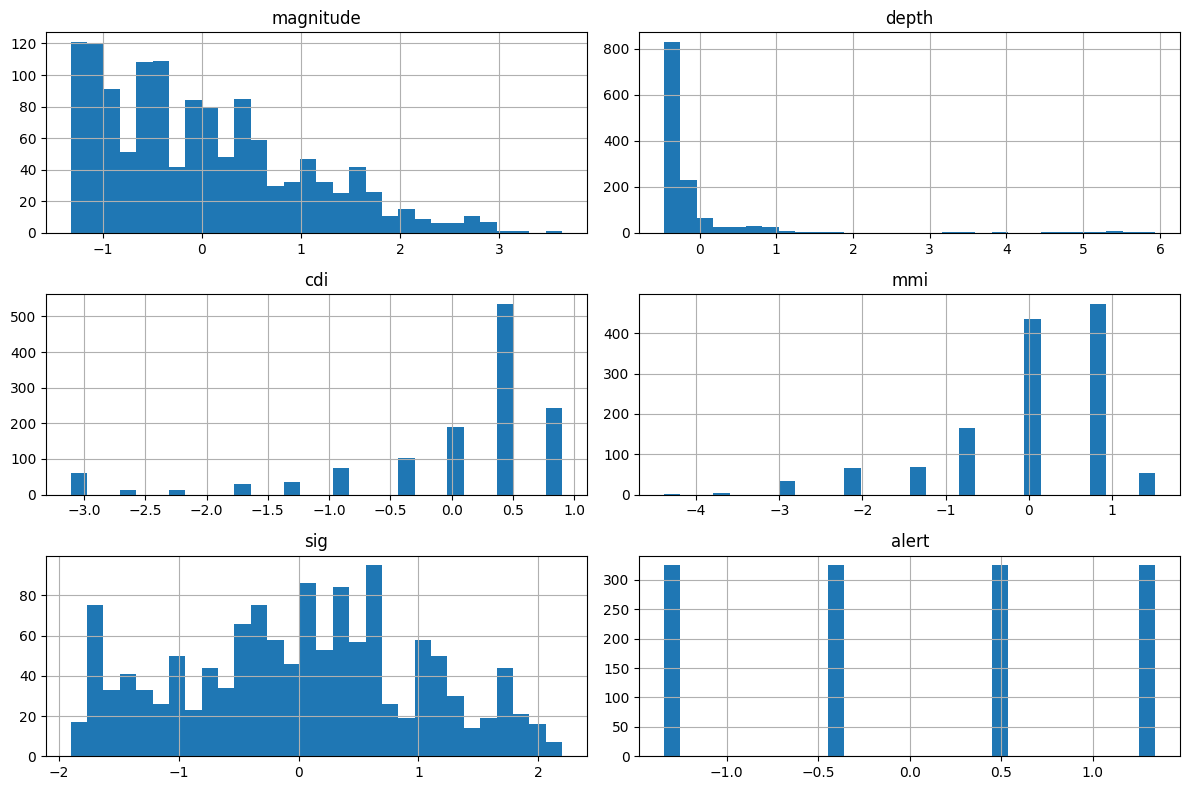

In [ ]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

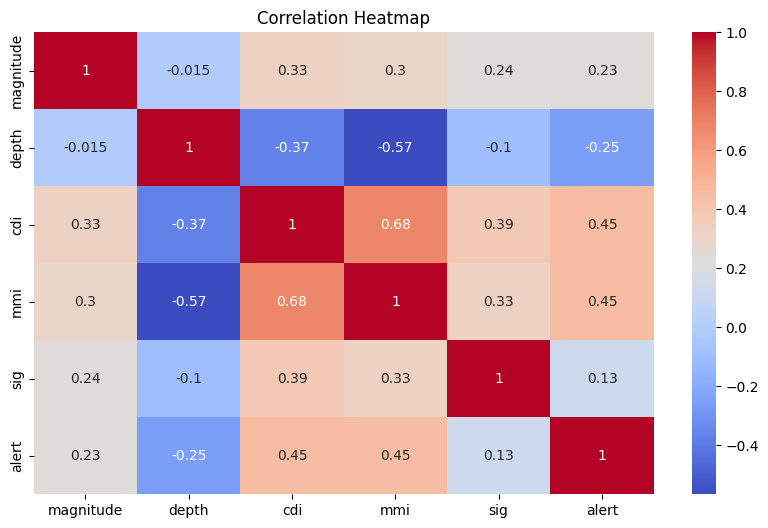

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()